# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<52>`
* Students: `<Jawwad Ahmed, Miguel Gómez, Emmanouil Jacovides, Reza Hosseini>`
* Dataset: `<Free Music Archive dataset>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
# Importing only the allowed packages for Part 1:

%matplotlib inline

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
# Importing the adjacency matrix that was created in the Milestone 1

adjacency =  np.load('adjacency.npy') # the adjacency matrix
n_nodes =  adjacency.shape[0] # the number of nodes in the network

# Getting the indices of upper triangle of the matrix
up_tri_idx = np.triu_indices(n_nodes)

# Counting the number of non-zero values in upper trianle of adjacency matrix which corresponds to number of edges
n_edges =  np.sum(adjacency[up_tri_idx]!=0) 

# Checking the results
print('\n Shape of adjacency matrix:', adjacency.shape, '\n\n unique values:', np.unique(adjacency))
print('\n Number of nodes real graph: ', n_nodes, '\n Number edges real graph: ' ,n_edges)


 Shape of adjacency matrix: (2000, 2000) 

 unique values: [0.         0.47365592 0.474212   ... 0.9996864  0.99999988 1.        ]

 Number of nodes real graph:  2000 
 Number edges real graph:  69485


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

The libraries have been imported previously to be able to import the adjacency matrix in Part 0

### Question 1

Create a function that constructs an Erdős–Rényi graph.

**Comment: Erdős–Rényi=ER**

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # Raise Error if p is not in the correct range
    if p<0 or p>1:
            raise ValueError("Probability 'p' should be in [0,1] range!")
    # Raise Error if n is not correct
    if n<=1:
            raise ValueError("n should be larger than 1!")
    # Initializing the seed
    
    if not seed is None:
        random.seed(seed)
        
    #STEP1 We create the initial graph
    ER = np.zeros((n,n)) #Filling in zeros
    
    for i in range(0,ER.shape[0]):
        for j in range(i+1, ER.shape[0]):
            r = random.random() #Using random.random to return the next random floating point number in the range [0.0, 1.0)
            if r <= p: #Connecting depending on the random floating point number generated with the probability parameter 
                ER[i,j] = 1

    #We make the matrix symmetric     
    ER = ER + ER.transpose()   
    
    return ER

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6) \n')

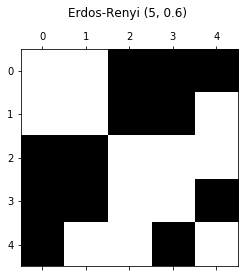

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6) \n')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4) \n')

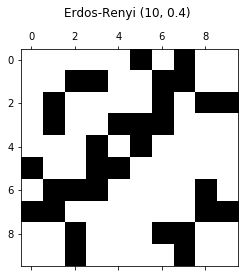

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4) \n')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [6]:
# Creating a random Erdos-Renyi graph with the same number of nodes of our real graph

# Number of nodes and edges given as per the real graph
num_nodes = 2000
num_edges = n_edges

# Probability parameter calculated based on formula provided from levtures
p = 2 * num_edges / (num_nodes * (num_nodes - 1))

# Creating the random Erdos-Renyi graph using real graph parameters
ER = erdos_renyi(2000, p, 9765)

# Cheking the matrix of the created graph and the probability p

print('\n Probability parameter:',p)

print('\n Erdos-Renyi graph using real graph parameters: \n',ER)


 Probability parameter: 0.034759879939969984

 Erdos-Renyi graph using real graph parameters: 
 [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**The same number of nodes as the real graph has been chosen, as well the same number of edges are used to compute the probability of creating a connection. These parameters have been chosen because we want to have a Erdos-Renyi graph that is random but could be as similar as possible to our real graph, being able to use it to model some properties.**

### Question 3

Create a function that constructs a Barabási-Albert graph.

**Comment: Barabási-Albert=BA**

In [7]:
def barabasi_albert(n, m, m0, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # Checking if m0 and m are correct
    
    if m0<1 or m>m0:
        raise Exception('ERROR: Please correct m0 and m! \n m0 should be greater than m, or m0 should be greater than 1!')
    
    # Initializing the seed
    if not seed is None:
        random.seed(seed)
        np.random.seed(seed)
    
    #Initializing step
    step_i = m0 #m0 should be higher or equal to m
    
    #Creating the graph containing zeros
    BA = np.zeros((n, n))
    
    # Initializing the probability of random attachment
    p_ini = 0.9 #1.0
    
    #Filling the initial m0xm0 matrix using probability of attachment
    # Note: we could have filled the whole matrix without considering any probability of attachment, but in practice we...
    #       got better results for larger graphs with this probability of attachment
    for i in range(0,step_i):
        for j in range(i+1, step_i):
            r = random.random()
            if r <= p_ini:
                BA[i,j] = 1
    
    # Adding transpose to make a symmetric matrix
    BA = np.maximum(BA, BA.T)
    
    #Changing the data type of BA to int
    BA = BA.astype(int)
    
    # Main loop for building the final BA[nxn] matrix
    while step_i < n:
        
        # Create a sub-matrix with ['step_i' x 'step_i'] dimension
        adj_i = BA[:step_i, :step_i]
        
        # Calculate the degree distribution of the sub-matrix
        deg_i = np.sum(adj_i, axis=1)
        
        # Calculating probabilities which the new nodes should attach to (Preferrential Attachment)
        p_i = deg_i/np.sum(deg_i)
        
        # Getting a list of nodes which the new node should attach to
        list_ones = np.sort(np.random.choice(step_i, m, replace=False, p=p_i))
        
        # Changing the value of the associated cells in adjacency matric equal to 1
        BA[list_ones,step_i]=1
        
        # Make the BA matrix symmetric again
        BA = np.maximum(BA, BA.T)
        
        # Adding one step to step_i (which acts as adding a new node in the next iteration of While loop)
        step_i += 1
    
    return BA

Text(0.5, 1.05, 'Barabasi-Albert (5, 1) \n')

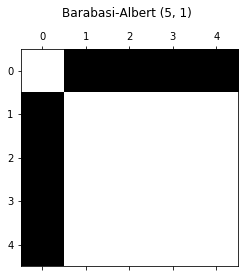

In [8]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1) \n')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2) \n')

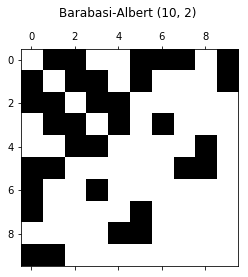

In [9]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2) \n')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [10]:
# Creating a random Barabási-ALbert graph with the same number of nodes of our real graph

m = int(n_edges / n_nodes)
m0 = m
BA = barabasi_albert(2000, m, m0, seed=None)
print('\n Barabási-Albert graph using real graph parameters: \n', BA)


 Barabási-Albert graph using real graph parameters: 
 [[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**The same number of nodes as the real graph has been chosen because we want to have a Barabási-Albert graph that is random but could be as similar as possible to our real graph.**

## Addition Section #1: Testing and Comparing our Erdos-Renyi Graph and Barabasi-Albert Graph functions

Text(0.5, 1.05, 'Erdos-Renyi Graph Test \n')

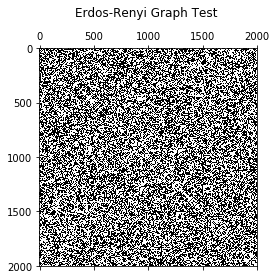

In [11]:
#Testing and plotting the Erdos-Renyi Graph

er_test = erdos_renyi(2000, 0.5, seed=8700)
plt.spy(er_test)
plt.title('Erdos-Renyi Graph Test \n')

#We expect to see a random distributed network (noise) with little to no major clusters

Text(0.5, 1.05, 'Barabasi-Albert Graph Test \n')

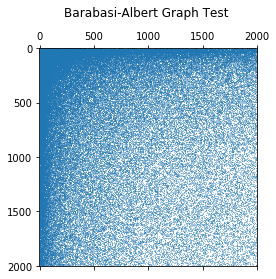

In [12]:
#Testing and plotting the Barabasi-Albert Graph

ba_test = barabasi_albert(2000, 30, 30, 8708)
deg_ba_test = np.sum(ba_test, axis=1)
plt.spy(ba_test, markersize= 0.1)
plt.title('Barabasi-Albert Graph Test \n')

#We expect to see decent clusiting especisally at the starting nodes section

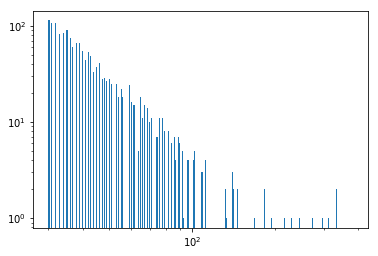

In [13]:
# Plotting the distribution of Barabasi-Albert Graph
# Histogram of log scale. 

plt.hist(np.sort(deg_ba_test), bins=1000)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.show()

#Expect to see a decreasing linear distribution

## Addition Section #2:  Comparing our Erdos-Renyi Graph and Barabasi-Albert Graph functions with NetworkX library

**This test has been done in Part 2 of the assignment where NetworkX has been imported**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [14]:
# Comparing the number of edges of the real network and ER and BA models

# Computing the number of edges of the Erdos-Renyi graph
edges_ER = np.sum(ER) / 2

# Computing the number of edges of the Barabási-ALbert graph
edges_BA =  np.sum(BA) / 2

# Printing the result for the number of edges
print('\n Edges in Real =', n_edges, '\n\n Edges in Erdős–Rényi =', edges_ER,'\n\n Edges in  Barabási-Albert =', edges_BA)


 Edges in Real = 69485 

 Edges in Erdős–Rényi = 69795.0 

 Edges in  Barabási-Albert = 67349.0


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [15]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    # Raise Error if the length of p and q are not the same
    if q.shape[0] != p.shape[0]:
            raise ValueError("p and q must have the same size!")
    
    # Changing array's data type to float
    q = q.astype(float)
    p = p.astype(float)
    
    # Replace any zero value to a very low value
    q[q==0.0]= 1.0e-20
    p[p==0.0]= 1.0e-20
    
    # Make sure the vectors are normalized, i.e. they are probability distribution
    p = 1.0*p/np.sum(p, axis=0)   # We mutliply by 1.0 to make sure we get float as a result
    q = 1.0*q/np.sum(q, axis=0)
    
    # We use logarithm in base 2, since it will give a number between [0, 1) which is more easier to interpret
    kl_div = (p * np.log(p/q)).sum()
    
    return kl_div

In [16]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Comment: In order to compute the KL divergence, degree distributions for the three graphs (real, ER and BA) have to be generated and normalised first in order to be able to do the KL divergence of the degree distributions of the three graphs. To do so, three different approaches have been presented to confirm the results by choosing different paths to resolve this problem.**

In [17]:

def degree(adjacency):
    """Computes the degrees for all nodes in a adjacency matrix
    
    Parameters
    ----------
    adjacency: np.array
        Adjacency matrix of the graph.
    
    Returns
    -------
    degree_mat: np.array
        Degrees of all nodes.
    """
    # We convert non-zeros in the adjacency matrix to ones
    adjacency[adjacency != 0] = 1
    
    # The rows are summed up to obtain the degree for each of the nodes
    degree_mat = np.array([np.sum(e) for e in adjacency.T])
    return degree_mat

 
def norm_weights(adjacency):
    """ Calculate the normalized degrees of a graph
    
        Parameters
    ----------
    adjacency: np.array
        Adjacency matrix of the graph.
    
    Returns
    -------
    norm_weights: np.array
        Normalized degrees of all nodes in the graph.
    """
    degree_mat = degree(adjacency)
    norm_weights= np.ones_like(degree_mat) / float(adjacency.shape[0])
    #norm_weights= 1.0*degree_mat / np.sum(degree_mat, axis=0)
    return norm_weights

In [18]:
# Checking that the functions generated work correctly by calling them

print('\n Degree of Real:', degree(adjacency))
print('\n Degree of ER:', degree(ER))
print('\n Degree of BA:', degree(BA))
print('\n Weights of Adjacency Real:', norm_weights(adjacency))
print('\n Weights of Adjacency ER:',norm_weights(ER))
print('\n Weights of Adjacency BA:',norm_weights(BA))


 Degree of Real: [61. 53. 82. ... 89. 60. 92.]

 Degree of ER: [69. 68. 53. ... 70. 77. 59.]

 Degree of BA: [288 298 354 ...  34  34  34]

 Weights of Adjacency Real: [0.0005 0.0005 0.0005 ... 0.0005 0.0005 0.0005]

 Weights of Adjacency ER: [0.0005 0.0005 0.0005 ... 0.0005 0.0005 0.0005]

 Weights of Adjacency BA: [0.0005 0.0005 0.0005 ... 0.0005 0.0005 0.0005]


## Calculating KL-Divergence: 
### Option 1: Using normal bins and let kl_divergence replace zero values with a very small numbers

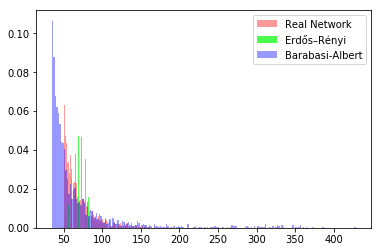


 The KL divergence between Erdős–Rényi and Real graph is: 18.804330046657046

 The KL divergence between Barabasi-Albert and Real graph is: 2.393776724641237


In [19]:
# We call the function degree to obtain the array with the degrees of each node for the three graphs: Real, ER and BA
degree_real = degree(adjacency)
degree_ER = degree(ER)
degree_BA = degree(BA)


# For the 3 matrices, we normalize using weights, weights of the three matrices are identical.
weights = norm_weights(adjacency)

# The degree distribution is created with plt.hist
# We chose a bins interval equally and let kl_divergence(.) function handle zero values
distr_real = plt.hist(degree_real, bins = 200, fc=(1, 0, 0, 0.4), 
                      weights=weights, label='Real Network'); 
distr_ER = plt.hist(degree_ER, bins = 200, fc=(0, 1, 0, 0.7), 
                    weights=weights, label='Erdős–Rényi');
distr_BA = plt.hist(degree_BA, bins = 200, fc=(0, 0, 1, 0.4), 
                    weights=weights, label='Barabasi-Albert');
plt.legend()
plt.show()

# We test the similarities between the graphs using KL_divergence 
print('\n The KL divergence between Erdős–Rényi and Real graph is:', kl_divergence(np.array(distr_ER[0]),np.array(distr_real[0])))
print('\n The KL divergence between Barabasi-Albert and Real graph is:',kl_divergence(np.array(distr_BA[0]),np.array(distr_real[0])))



#### Discussion:
    We think this is the best approximation for calculating KL divergence, since bins are small and equal, and the values that we have substituted for zero values are small enought to give us a good approximation

In [20]:
# Checking the values for the size and distribution of the real graph

print('\n The size of the created distribution is:', np.size(distr_real[0]))
print('\n Distribution: \n',distr_real[0])


 The size of the created distribution is: 200

 Distribution: 
 [0.063  0.0545 0.047  0.0435 0.0465 0.0335 0.034  0.028  0.0345 0.0375
 0.03   0.0285 0.     0.023  0.0235 0.026  0.023  0.023  0.0185 0.016
 0.0145 0.012  0.014  0.0145 0.     0.014  0.015  0.015  0.013  0.014
 0.0125 0.011  0.0115 0.0105 0.0045 0.0075 0.0085 0.     0.006  0.008
 0.0085 0.005  0.0045 0.0055 0.006  0.006  0.004  0.0045 0.006  0.
 0.0035 0.004  0.0065 0.004  0.0045 0.003  0.0025 0.003  0.004  0.002
 0.004  0.003  0.     0.0025 0.0035 0.001  0.004  0.001  0.001  0.003
 0.0025 0.0025 0.002  0.0005 0.     0.002  0.002  0.002  0.001  0.0025
 0.0005 0.0015 0.0005 0.002  0.001  0.0015 0.001  0.     0.0025 0.0025
 0.     0.0005 0.0005 0.0005 0.001  0.001  0.001  0.001  0.001  0.
 0.0005 0.0015 0.001  0.     0.0005 0.001  0.     0.0005 0.0005 0.
 0.001  0.001  0.     0.0005 0.001  0.001  0.     0.     0.     0.0005
 0.0005 0.     0.     0.     0.     0.     0.     0.0005 0.     0.
 0.     0.     0.     0.     0.  

### Option 2: Manually choosing bins in a way that all bins have non-zero values

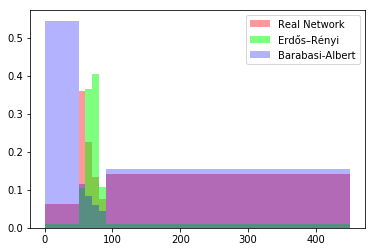


 The KL divergence between Erdős–Rényi and Real graph is: 0.4863702310335171

 The KL divergence between Barabasi-Albert and Real graph is: 0.903271524147222


In [22]:
# OPTION 1: Distribution generation and ploting using plt.hist

# We call the function degree to obtain the array with the degrees of each node for the three graphs: Real, ER and BA
degree_real = degree(adjacency)
degree_ER = degree(ER)
degree_BA = degree(BA)


# For the 3 matrices, we normalize using weights, weights of the three matrices are identical.
weights = norm_weights(adjacency)

# The degree distribution is created with plt.hist
# We chose a bins interval such that there is no 0 component, otherwise the KL divergence is not defined.
distr_real = plt.hist(degree_real, bins = [1,51,60,70,80,90,450], fc=(1, 0, 0, 0.4), 
                      weights = weights, label='Real Network'); 
distr_ER = plt.hist(degree_ER, bins = [1,51,60,70,80,90,450], fc=(0, 1, 0, 0.5), 
                    weights = weights, label='Erdős–Rényi');
distr_BA = plt.hist(degree_BA, bins = [1,51,60,70,80,90,450], fc=(0, 0, 1, 0.3), 
                    weights = weights, label='Barabasi-Albert');
plt.legend()
plt.show()

# The bins intervalls defined here are limiting our analysis because they are uneven and have some large intervalls, 
# but they still give an approximation of the similarity between the matrices


# We test the similarities between the graphs using KL_divergence 
print('\n The KL divergence between Erdős–Rényi and Real graph is:', kl_divergence(np.array(distr_ER[0]),np.array(distr_real[0])))
print('\n The KL divergence between Barabasi-Albert and Real graph is:',kl_divergence(np.array(distr_BA[0]),np.array(distr_real[0])))

#### Discussion:
    Clearly, this is not a good approximation compared to previous option, since we assumes a constant probability distribution over a large range of bins (from 90 to 450). But, still it's a way to solve the problem of dividing by zero in KL divergence function 

In [23]:
# Checking the values for the size and distribution of the real graph

print('\n The size of the created distribution is:', np.size(distr_real[0]))
print('\n Distribution: \n',distr_real[0])


 The size of the created distribution is: 6

 Distribution: 
 [0.063  0.359  0.226  0.135  0.0745 0.1425]


### Option 3: Calculating distribution mannually 

In [24]:
# OPTION 3
# We define a function to compute the distributions manually

def distribution(adjacency, n_nodes, range_limit):
    
    # We convert non-zeros in the adjacency matrix to ones
    adjacency[adjacency != 0] = 1
    
    # The rows are summed up to obtain the degree for each of the nodes
    degree_mat = np.array([np.sum(e) for e in adjacency.T])
    
    # Distribution is created by usinf for loop
    distribution = np.zeros(n_nodes)
    ones = np.ones(n_nodes)
    
    # For each node degree, a distribution is created by checking how many nodes have each of the possible degrees
    for i in range(0, n_nodes-1):
        distribution[i] = np.sum(ones[degree_mat == i])
        
    #Distribution is normalised to the number of nodes and limited to a range avoid having zeros   
    distribution = distribution[range(0, range_limit)] / n_nodes
    
    return distribution    


 The size of the created distribution is: 2000

 The sum of the distribution is: 1.0


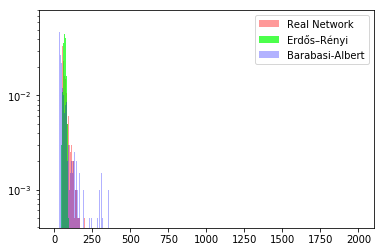


 The KL divergance between Erdős–Rényi and Real graph is: 2.433071486417424

 The KL divergance between Barabasi-Albert and Real graph is: 0.4916750214976465


In [25]:
# OPTION 3: Computing the distribution manually

number_nodes = 2000
limit_distr = 2000

# The distributions are created calling the function 'distribution'
distr_real3 = distribution(adjacency, number_nodes, limit_distr)
distr_ER3 = distribution(ER, number_nodes, limit_distr)
distr_BA3 = distribution(BA, number_nodes, limit_distr)

# Checking the size of the distribution and checking that the sum is 1
print('\n The size of the created distribution is:', np.size(distr_real3))
sum3 = np.sum(distr_real3)
print('\n The sum of the distribution is:', sum3)


# The distributions are plotted THEY
plt.bar(np.array(range(0, limit_distr)), distr_real3, 1, fc=(1, 0, 0, 0.4), label='Real Network')
plt.bar(np.array(range(0, limit_distr)), distr_ER3, 1, fc=(0, 1, 0, 0.7), label='Erdős–Rényi')
plt.bar(np.array(range(0, limit_distr)), distr_BA3, 1, fc=(0, 0, 1, 0.3), label='Barabasi-Albert')

plt.yscale('log', nonposy='clip')
plt.legend()
plt.show()
# We set 0 values to 0.0001 to make sure we can compute KL divergence.
no_zeros3 = 0.0001

distr_real3[distr_real3 == 0] = no_zeros3 
distr_ER3[distr_ER3 == 0] = no_zeros3 
distr_BA3[distr_BA3 == 0] = no_zeros3 

# We test the similarities between the graphs using KL_divergence 
print('\n The KL divergance between Erdős–Rényi and Real graph is:', kl_divergence(np.array(distr_BA3), np.array(distr_real3)))
print('\n The KL divergance between Barabasi-Albert and Real graph is:', kl_divergence(np.array(distr_ER3), np.array(distr_real3)))

#### Discussion: 
    The result is not very good. But, it's still another way to compute the KL divergence.

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

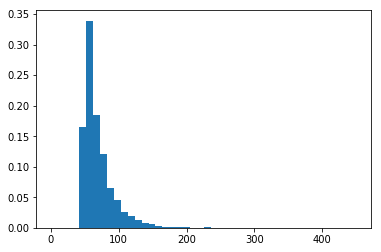

In [26]:
# Real network degree distribution histogram

weights = norm_weights(adjacency)
plt.hist(degree_real, bins = np.linspace(1,450,45), weights = weights);

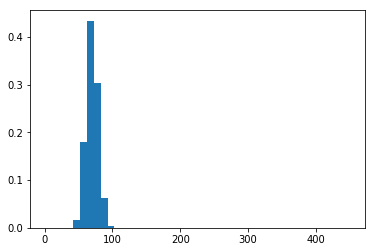

In [27]:
# Erdős–Rényi degree distribution histogram

plt.hist(degree_ER, bins = np.linspace(1,450,45), weights = weights);

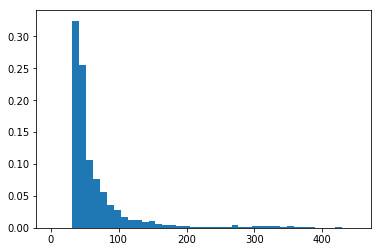

In [28]:
# Barabasi Albert degree distribution histogram

plt.hist(degree_BA, bins = np.linspace(1,450,45), weights = weights);

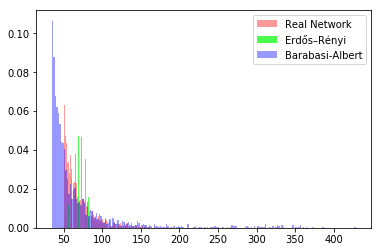

In [29]:
# Plotting the degree distributions of the 3 graphs together (using equall bins, OPTION 1)

distr_real = plt.hist(degree_real, bins = 200, fc=(1, 0, 0, 0.4), 
                      weights=weights, label='Real Network'); 
distr_ER = plt.hist(degree_ER, bins = 200, fc=(0, 1, 0, 0.7), 
                    weights=weights, label='Erdős–Rényi');
distr_BA = plt.hist(degree_BA, bins = 200, fc=(0, 0, 1, 0.4), 
                    weights=weights, label='Barabasi-Albert');
plt.legend()
plt.show()

**Legend: Blue = Real Graph, Red = Erdős–Rényi Graph and Green = Barabasi Albert Graph**

**We can see that the blue and the green distributions are the less similar, This confirms the KL_Divergence results we got, since Erdős–Rényi and BA KL were always the highest (around 1.5). We can also see that Erdős–Rényi and our Adjacency distributions (blue and red) are more similar than Barabasi Albert (green) and our Adjaceny distributions (even if it is not completely different). This is also represented by our KL Divergance values that are slightly different but higher for the Barabasi Albert and Real Adjaceny pair.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Although the networks may have same degree distributions, the structural properties can be different, hence obtaining different graphs. For instance, there could be two networks with the same degree distribution but one of them could have much larger number of components and a smaller giant component, etc while the other could have few components and a much bigger giant component.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [30]:
# Importing networkx even tho we already imported in Part 1 
# Only a formality

import networkx as nx

## Addition Section #2:  Comparing our Erdos-Renyi Graph and Barabasi-Albert Graph functions with NetworkX library

Text(0.5, 1.05, 'Erdos-Renyi Graph using NetworkX \n')

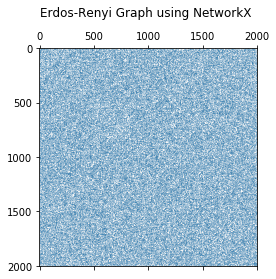

In [31]:
# Only using networkX here to confirm our functions
# The library has not been used for any other purpose in Part 1

import networkx as nx

#Testing Erdos-Renyi Graph using NetworkX

ER_bar = nx.erdos_renyi_graph(2000, 0.05, 8700)
ER_bar_ad = nx.adjacency_matrix(ER_bar)
deg_ER_test = np.sum(ER_bar_ad, axis=1)
plt.spy(ER_bar_ad, markersize = 0.03)
plt.title('Erdos-Renyi Graph using NetworkX \n')

Text(0.5, 1.05, 'Barabasi Albert Graph using NetworkX \n')

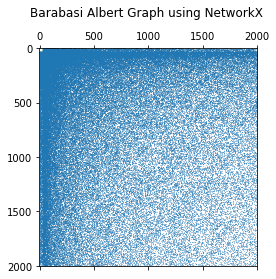

In [32]:
#Testing Barabasi Albert Graph using NetworkX

BA_bar = nx.barabasi_albert_graph(2000, 30, 8700)
BA_bar_ad = nx.adjacency_matrix(BA_bar)
deg_BA_test = np.sum(BA_bar_ad, axis=1)
plt.spy(BA_bar_ad, markersize = 0.1)
plt.title('Barabasi Albert Graph using NetworkX \n')

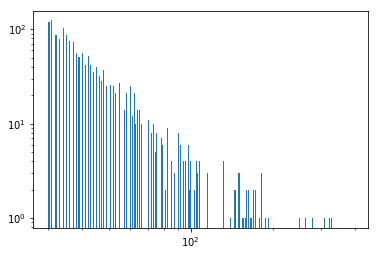

In [33]:
# Plotting the distribution of Barabasi-Albert Graph
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale

plt.hist(np.sort(deg_BA_test), bins=1000)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.show()

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**After studying different possible graphs, considering our real graph has two strong communities, Rock and Hip-Hop music genres, we decided to implement Random Partition Graph. With Random partition we could model the existance of two communities that are created randomly. We expect to be able to obtain the model for two clusters with a similar average degree as our graph.**

### Question 11

Explain (in short) how the chosen model works.

**A partition graph is a graph of communities in which nodes in the same group are connected with probability p_in and nodes of different groups are connected with probability p_out. With this type of graph we could model the two communities that are present in our graph, Rock and Hip-Hop communities/clusters. As well, we can model the fact that Hip-Hop songs will be better connected between them and less connected with the Rock songs and vice versa for the Rock songs.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [34]:
# Creating a random partition graph with two clusters of 1000 nodes (Rock songs) and 1000 nodes (hip-hop songs)
# It is confirmed that we have 1000 hip hop songs and 1000 rock songs as we identified them using the previous milestone

G = nx.random_partition_graph([1000,1000],.059,.01)

In [35]:
# Creating the adjacency matrix of the random partition graph

G_ad = nx.adjacency_matrix(G)

In [36]:
# Creating an array containin the degree of each node of the random partition graph

G_deg = np.array([np.sum(e) for e in G_ad.T]) 


 The size of the distribution is: 44

 Distribution: (array([1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.25e-02, 1.66e-01,
       4.49e-01, 2.97e-01, 7.25e-02, 3.00e-03, 1.00e-20, 1.00e-20,
       1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20,
       1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20,
       1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20,
       1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20,
       1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20, 1.00e-20,
       1.00e-20, 1.00e-20]), array([  0.        ,  10.22727273,  20.45454545,  30.68181818,
        40.90909091,  51.13636364,  61.36363636,  71.59090909,
        81.81818182,  92.04545455, 102.27272727, 112.5       ,
       122.72727273, 132.95454545, 143.18181818, 153.40909091,
       163.63636364, 173.86363636, 184.09090909, 194.31818182,
       204.54545455, 214.77272727, 225.        , 235.22727273,
       245.45454545, 255.68181818, 265.90909091, 276.13636364,
      

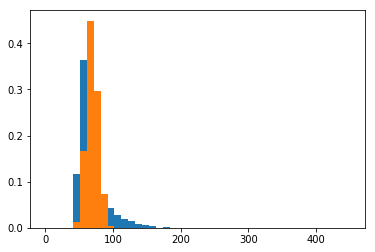

In [45]:
# Creating a degree distribution for the random partition graph calling function 'distribution'
degree_partition = degree(G_ad)
distr_real2 = plt.hist(degree_real, bins = np.linspace(0, 450, 45), weights = weights); 
distr_partition = plt.hist(degree_partition, bins = np.linspace(0, 450,45), weights = weights);
distr_partition[0][distr_partition[0] == 0] = 1.0e-20

print('\n The size of the distribution is:',np.size(distr_partition[0]))
print('\n Distribution:',distr_partition)

### Question 13

Check the properties you expected to be similar, and compare to your network.

Text(0.5, 1.05, 'Adjacency Matrix Real Graph \n')

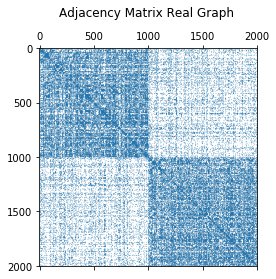

In [39]:
# Plotting the Real Graph
plt.spy(adjacency, markersize = 0.05)
plt.title('Adjacency Matrix Real Graph \n')

Text(0.5, 1.05, 'Adjacency Matrix of Random Partition Graph \n')

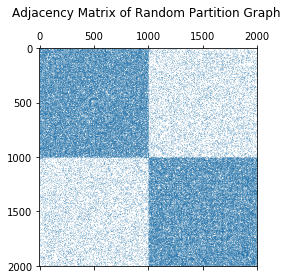

In [40]:
# Plotting the two communities present in the Random Partition Graph
plt.spy(G_ad, markersize = 0.05)
plt.title('Adjacency Matrix of Random Partition Graph \n')

In [46]:
#Calculating the KL divergence

print('\n KL-Divergence:', kl_divergence(np.array(distr_partition[0]), np.array(distr_real2[0])))


 KL-Divergence: 0.45775019031879505


Are the results what you expected? Explain.

**As shown in the plotted Random Partition Graph above, we can clearly model the two communities that are present in our Real Graph, the Hip-hop and Rock genres. The result was very much expected as we wanted to take benefit of the two large community feature of our real network. We selected our model based on this particular feature and having obtained a plot which is extrememly similar to the real network is great. Visually we are very satisfied and as for other parameters such as the KL-divergence, the KL-divergence is low, giving more credability to our model accurately representing the real network**